# Tutorial 1A: Numerical Integration of Exponential Growth 

© 2018 Griffin Chure. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

---

In [17]:
import numpy as np # For numerics
import matplotlib.pyplot as plt # To make plots
import seaborn as sns # To make plots look much better
sns.set_context('talk')
# Allows matplotlib plots to render in Python 3.6 and below
%matplotlib inline 

In this tutorial, we will explore exponential growth through numerical integration -- a handy technique for numerically evaluating differential equations.

## Revisiting bacterial growth

In class, we used some simple back-of-the-envelope estimates to figure out what sets the speed limit for bacterial growth. But what does this speed limit mean for the growth of populations? To answer this question, we turn to writing a simple ordinary differential equation.

Throughout the course, we will repeatedly mathematize our thinking using differential equations. For example, we can write a differential equation for a growing bacterial culture as 

$$
{dN \over dt} = r N(t) \tag{1},
$$

where $N$ is the the number of cells, $t$ is time (in whatever units we deem appropriate), and $r$ is the rate of bacterial growth. This differential equation can be very easily solved for $N(t)$ as

$$
N(t) = N_0 e^{rt} \tag{2},
$$

where $N_0$ is the intial number of starting cells. While getting to this result is relatively simple, this will certainly not be the case for every differential equation we write! It some cases, there may not even be a closed form solution. To solve such equations, we will have to turn to our computers to do the work for us. 

## The Forward-Euler Algorithm

There are seemingly countless numerical integrators available to you in nearly all computer programming languages. The simplest and easiest to code (although it has some limitations) is the Forward-Euler method. In this approach, we take very small steps forward in time, calculate the change in our quantity of interest, and then add that change to our result from the previous time step. 

Let's look back at Eq. 1, but rewrite it in a different way. We can say that the number of cells present at some time $t + \Delta t$ is

$$
N(t + \Delta t) = N(t) + r N(t) \Delta t. \tag{3}
$$

If we taking yet another step forward in time could similarly be stated as

$$
N(t + 2\Delta r) = N(t + \Delta t) + r N(t + \Delta t) \Delta t. \tag{4}
$$

At each time step, we are simply adding the number of cells added in that interval $\Delta t$ as was defined in our initial differential equation. 

But how do we choose our time step? For this approach to work, we must take steps forward in time that are sufficiently small such that no more than one event described in our model can take place. In the context of exponential growth, for example, we would not want to take steps forward in time that are larger than the growth rate where multiple divisions could occur. This requirement, known as the [Courant-Friedrichs-Lewy condition](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition) is important for many types of time-marching computer simulations.

## Shut up and code!

Let's put our euros where our mouth is and code up this integrator for the case of simple exponential growth. Before we jump right in we need to define some parameters first. We'll start with the biologically meaningful parameters. 

In [18]:
# Define parameters for the exponential growth
N_0 = 1 # Initial number of cells 
r = 0.03 # Growth rate of cells in generations per minute
total_time = 150 # Total time of the integration in minutes.

We now need to set the the time step for our integrator. We'll start with a sufficiently small time step that will give proper integration, but not too small as to seriously slow down our computers 

In [19]:
# Define parameters for the numerical integrator
delta_t = 0.1 # time step in minutes
n_time_steps = int(total_time / delta_t) 

In the above code cell, we defined the size of our time step and figured out how many we will need to take given the total time of our experiment. While `n_time_steps` is an integer quantity (you can't have 1.3 steps!), simply dividing `total_time` by `delta_t` would result in a floating point number. By adding `int(...)`, I have forced the result to be an integer which will prove be important for us shortly. 

We now have just about everything we need to begin our integration. The one last things we need to do is set our initial condition and then loop through all of the time steps. As we would like to keep track of the number of cells as a function of time, we'll make a vector full of zeros that has the same length as `n_time_steps`.

In [20]:
# Set up the empty vector where we will store the number of cells at time t.
N_t = np.zeros(n_time_steps)

# Set the initial condition by indexing the array. 
N_t[0] = N_0

We're now ready to do the integration! Starting at the second time point (index `1`), we'll calculate how many cells were added in a single time step and update our storage vector `N_t`. 

In [21]:
# Loop through each time step
# We say range(1, N) instead of range(N) to begin at index 1
for t in range(1, n_time_steps): 
    
    # Calculate the change in the number of cells. 
    dN = N_t[t - 1] * r * delta_t
    
    # Update the number of cells at the current time point
    N_t[t] = N_t[t - 1] + dN    

And that's it! Because of the simplicity of this problem, this code should run almost instantaneously on your machine. Let's plot our result to see if we got exponential growth out of it all.

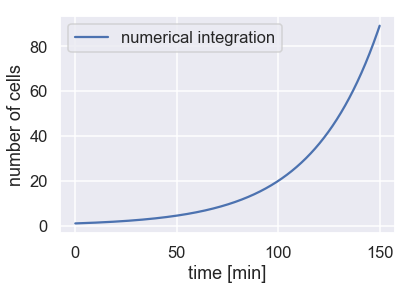

In [22]:
# Set up the time array for the x axis
# np.arange will arrange numbers from 0 to the total time, taking steps of dt
time_range = np.arange(0, total_time, delta_t)


# Plot our calculation as a blue line
plt.plot(time_range, N_t, 'b-', label='numerical integration')

# Add an appropriate label and legend
plt.xlabel('time [min]')
plt.ylabel('number of cells')
plt.legend()

What a relief! We've been able to numerically integrate Eq. 1 by hand. To ensure that we get the correct result, we can plot a subset of points from the numerical integration over our analytical solution in Eq. 2. 

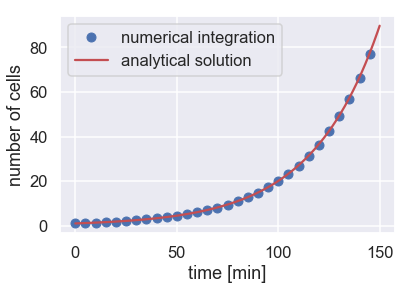

In [23]:
# Compute the analytical solution.
solution = N_0 * np.exp(r * time_range)

# Plot every 50 points from the numerical integration.
plt.plot(time_range[::50], N_t[::50], 'bo', label='numerical integration')

# Plot the analytical solution as a red line. 
plt.plot(time_range, solution, 'r-', label='analytical solution')

# Add appropriate labels. 
plt.xlabel('time [min]')
plt.ylabel('number of cells')
plt.legend()

It looks like our simple numerical integrator works as advertised and converges to the analytical result. Of course, you can not always use this as a sanity check as you often won't have the analytical solution. 

###  Breaking the CFL Condition

As mentioned earlier, the stability of this method depends entirely on us taking a short enough time step such that we only observe at most one event. Let's now try to break that  by taking a longer time step, say `delta_t = 10`. 

In [24]:
# Set the new parameters
delta_t_long = 10 
n_time_steps_long = int(total_time / delta_t_long)

# Set the storage vector so we don't rewrite our correct approach
N_t_long = np.zeros(n_time_steps_long)
N_t_long[0] = N_0

# Loop through each time step
for t in range(1, n_time_steps_long): 
    
    # Calculate the change in the number of cells. 
    dN = N_t_long[t - 1] * r * delta_t_long
    
    # Update the number of cells at the current time point
    N_t_long[t] = N_t_long[t - 1] + dN    

To see the failure, we can plot it along side our analytical solution. 

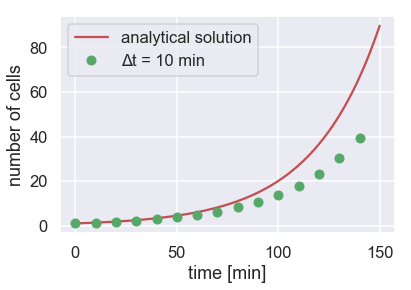

In [25]:
# Plot the analytical solution
plt.plot(time_range, solution, 'r-', label='analytical solution')

# Plot every fifth point from the long time step integration
time_range_long = np.arange(0, total_time, delta_t_long)
plt.plot(time_range_long, N_t_long, 'go', label='Δt = 10 min')

# Add labels as usual
plt.xlabel('time [min]')
plt.ylabel('number of cells')
plt.legend()

We see here that fir the first few points, our numerical integration is noticably different from the analytical solution, revealing that our time step was too long. Before you launch an integration yourself, be sure to take time and think carefully about the parameters you have fed in! 

## Exercise: The Logistic Growth Equation 

While the result from Eq. 1 seems logical, it is only valid for a limited time scale. Without some kind of feedback, this growth law states that cells would continue to grow exponentially *forever*. However, we know that the cells have some limitations, whether it be the availability of carbon or the space available for new cells to grow into. Such restrictions put a limit on the maximal number of cells that can inhabit a given environement, known as the carrying capacity. This concept was first put forward in 1838 by [François Verlhust](https://en.wikipedia.org/wiki/Pierre_Fran%C3%A7ois_Verhulst) and mathematized as 

$$
{dN \over dt} = rN(t)\left(1 - {N(t) \over K}\right) \tag{5},
$$

where we've introduced $K$ as the carrying capacity. From looking at this equation, we can see that as the total number of cells gets closer and closer to $K$, the number of cells added during a particular time step gets smaller and smaller until the carrying capacity is met, $N = K$.

Unlike Eq. 1, this differential equation is much less trivial to solve, although an analytical solution exists. Let's put our skills of numerical integration to the test and integrate Eq. 5 using a few different values for the carrying capacity.

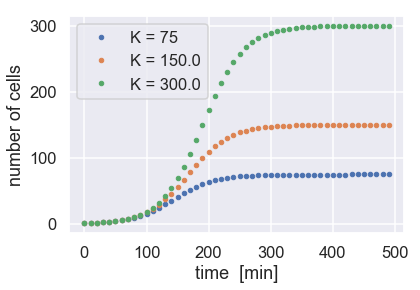

In [26]:
# Set the carrying capacity:
K = [75, 1.5E2, 3E2]

# Extend the total time of the integration
delta_t = 0.1
total_time = 500
time_range = np.arange(0, total_time, delta_t)
n_time_steps = int(total_time / delta_t)
# Set the storage vector so we don't rewrite our correct approach
N_t = np.zeros((len(K), n_time_steps))
N_t[:, 0] = N_0

# Loop through each carrying capacity
for k in range(len(K)): 
    
    # Loop through each time step.
    for t in range(1, n_time_steps): 
    
        # Calculate the change in the number of cells. 
        dN = N_t[k, t - 1] * r * delta_t * (1 - N_t[k, t - 1] / K[k])
    
        # Update the number of cells at the current time point
        N_t[k, t] = N_t[k, t - 1] + dN
         
# Loop through the carrying capacities and plot every 100th point.
for i in range(len(K)):
    plt.plot(time_range[::100], N_t[i, ::100], '.', label='K = ' + str(K[i]))
    
# Add appropriate labels and legends. 
plt.xlabel('time  [min]')
plt.ylabel('number of cells')
plt.legend() 

While the rate of growth is the same for all three cases, the imposed carrying capacity causes growth to cease at different times. We also see that growth slows down gradually as the carrying capacity is approached, rather than simply rocketing to the carrying capacity at the maximal rate. We could tune this logistic growth even further to account for the senecense of cells, reducing the number of individuals below the carrying capacity.

### Analytical Solution for Logistic Growth

As mentioned above, there is an analytical solution for the logistic growth model given in Eq. 5, although it is less straightforward to solve than Eq. 1. For posterity's sake, we will solve the logistic growth differential equation and plot it over the solution found through numerical integration. By separation of variables, we can rewrite Eq. 5 as

$$
rdt = {dN \over N\left(1 - {N \over K}\right)} \tag{6}
$$

We can now integrate both sides, 

$$
\int r dt = \int {1 \over N \left(1 - {N \over K}\right)} dN, \tag{7}
$$

but the integral on the rightside of Eq. 7 is quite difficult to solve. As a first step, we can use a [partial fraction decomposition](https://en.wikipedia.org/wiki/Partial_fraction_decomposition) to break the integrand into two pieces,

$$
{1 \over rN\left(1 - {N \over K}\right)} = {A \over N} + {B \over 1 - {N  \over K}}, \tag{8}
$$

where $A$ and $B$ are unknown constants. We can clear the fractions from Eq. 8 as

$$
1 = A\left(1 - {N \over K}\right) + BN.  \tag{9}
$$

This formulation allows us to identify the constants $A$ and $B$ by looking at the extrema. When $N = 0$, Eq. 9 becomes

$$
1 = A\times(1 - 0) + B\times 0 \tag{10},
$$

meaning that

$$
A = 1. \tag{10}
$$

Conversely, when $N = K$, we find the value of $B$ to be 

$$
B = {1 \over K} \tag{11}.
$$

The right-hand integral in Eq. 7 can now be rewritten as

$$
\int {1 \over rN\left(1 - {N \over K}\right)} = \int {1 \over N} dN + \int {{1 \over K} \over 1 - {N \over K}} dN. \tag{12}
$$

Using u-substitution for the right-hand integral in Eq. 12, we can now return to Eq. 7 and integrate both sides, arriving at

$$
rt + C = \ln N - \ln \left(1 - {N \over K}\right) \tag{13},
$$

where $C$ is a constant of integration. Exponentiating both sides of Eq. 13 ands solving for $N$ yields

$$
N = {e^C e^{rt} \over 1 + {e^{c}e^{rt} \over K}} \tag{14}.
$$

We can massage this into a more friendly form by multiplying the top and bottom by $Ke^{-rt}$ to arrive at

$$
N = {e^C K \over Ke^{-rt} + e^C}. \tag{15}
$$

We are still left with our constant of integration $C$ hanging around in our equation. We can determine this constant by noticing that at our initial time $t = 0$, the number of cells $N_0$ is 

$$
N_0 = {e^C K \over K + e^C}. \tag{16},
$$

which, with some rearrangement, gives us

$$
e^C = {N_0 K \over K - N_0}. \tag{17}
$$

We can now plug this back into Eq. 15 and do some algebra to arrive at our analytical solution for the number of cells at time $t$ as

$$
N(t) = {N_0 K \over e^{-rt}(K - N_0) + N_0}. \tag{18}
$$

Though still manageable, this is not nearly as trivial as finding the analytical solution for unrestricted exponential growth given as Eq. 1! For a quick sanity check, we can plot this analytical solution over the results from our numerical integration.

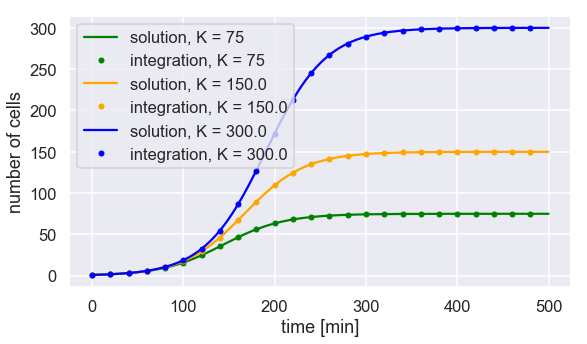

In [32]:
# Solve the analytical solution for our three carrying capacities.  
solution = np.zeros((len(K), n_time_steps))
for i in range(len(K)):
    solution[i, :] = N_0 * K[i] / (np.exp(-r * time_range) * (K[i] - N_0) + N_0)
    
# Define the colors so they match up. 
colors = ['green', 'orange', 'blue']

# Set up a figure that's a bit bigger
fig = plt.figure(figsize=(9, 5))

# Plot the analytical solutions and numerical integrations 
for i in range(len(K)):
    # Analytical solution
    plt.plot(time_range, solution[i,:], color=colors[i], 
             label='solution, K = ' + str(K[i]))
    
    # Numerical integration
    plt.plot(time_range[::200], N_t[i, ::200], '.', markersize=10, color=colors[i],
            label='integration, K = ' + str(K[i]))
   
# Add axis labels and a legend.
plt.xlabel('time [min]')
plt.ylabel('number of cells')
plt.legend()

##  In Conclusion...

Again, we see that our simple numerical integration gave us the same result as our analytical solution. While having an analytical solution is often very desireable, it's not always necessary. It's up to you to decide when you need to grind through the math to get the solution versus using numerical integration.

While we used the Forward-Euler method to perform these integrations, this method is rather unstable and there are some differential equations for which it simply will not work. In your research, you will want to use integration packages in the programming language of your choice (such as [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) for Python or [`ode45`](https://www.mathworks.com/help/matlab/ref/ode45.html) in MATLAB). These methods, though more complicated, are far faster and more robust to pathological functions that the Forward-Euler method.